Mean Squared Error: 17495476312.998245
R^2 Score: 0.984158440266408


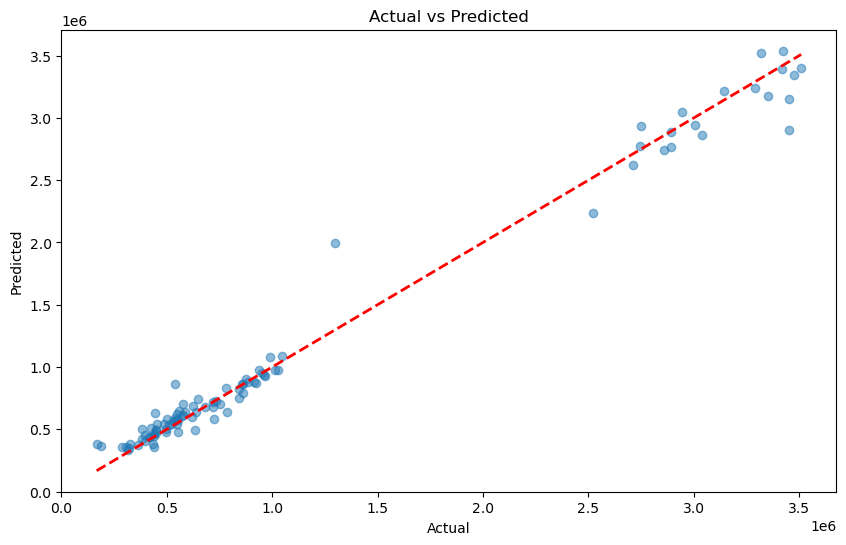

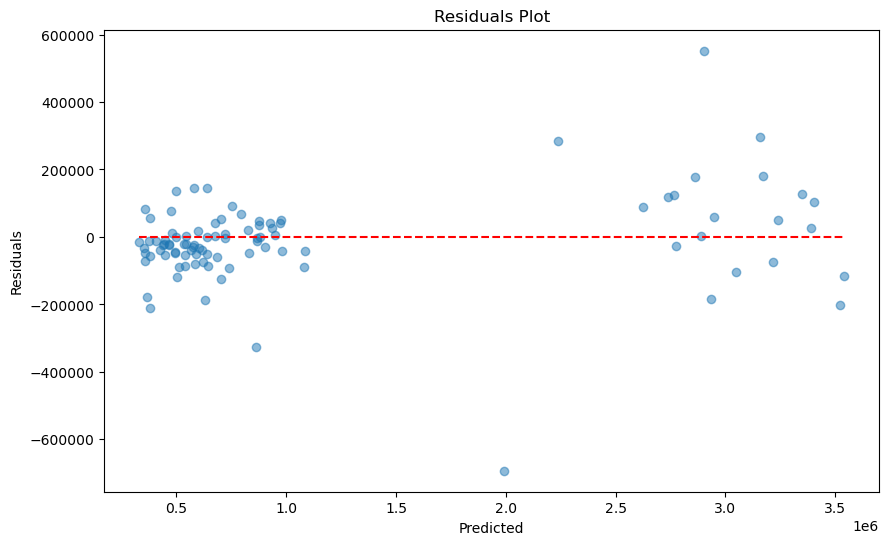

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = r"C:\Users\james\DATA_LAB\KTX_Forecasting\data\ktx_finalfinal_data.xlsx"
df = pd.read_excel(file_path)

# 날짜와 주운행선을 기준으로 정렬
df = df.sort_values(by=['운행년월', '주운행선'])

# 타겟 변수 생성 (다음 달 승차인원수)
df['승차인원수T2'] = df.groupby('주운행선')['승차인원수'].shift(-1)

# 마지막 행은 다음 달 승차인원수가 없으므로 제거
df = df.dropna(subset=['승차인원수T2'])

# 필요한 열만 선택
df = df[['운행년월', '주운행선', '승차인원수', '승차인원수T2']]

# X와 Y 분리
X = df[['승차인원수']]
Y = df['승차인원수T2']

# 데이터 분할 (훈련 데이터와 테스트 데이터로 분할)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


##선형회귀분석
# 모델 학습
model = LinearRegression()
model.fit(X_train, Y_train)

# 예측
Y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 잔차 계산
residuals = Y_test - Y_pred

# 잔차 플롯
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Mean Squared Error: 84253791361.97751
R^2 Score: 0.9237110528022179


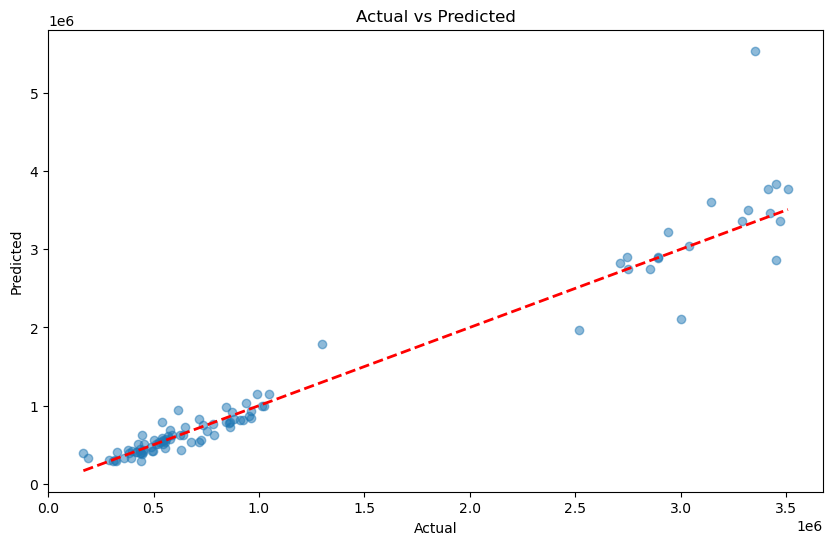

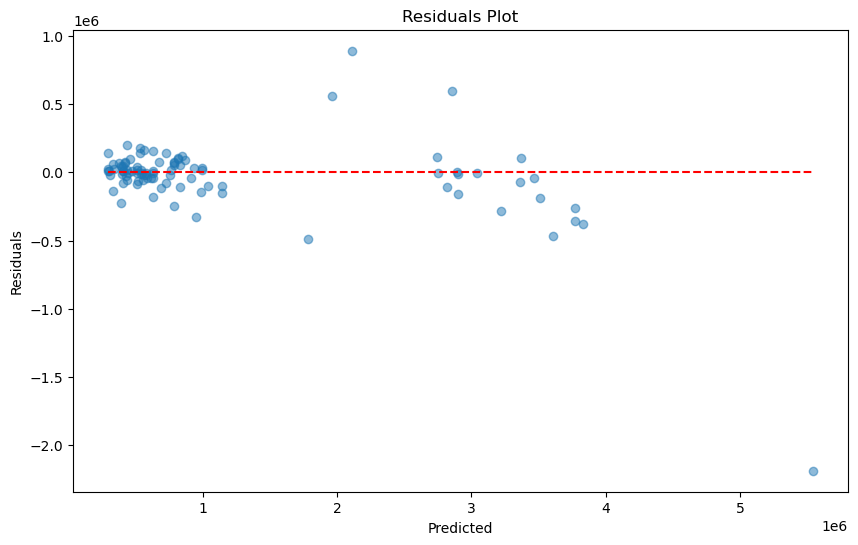

In [3]:
from sklearn.ensemble import RandomForestRegressor

##랜덤 포레스트
# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 예측
Y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 잔차 계산
residuals = Y_test - Y_pred

# 잔차 플롯
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.3/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.8/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.4/99.8 MB 7.9 MB/s eta 0:00:13
    --------------------------------------- 1.9/99.8 MB 8.5 MB/s eta 0:00:12
    --------------------------------------- 2.4/99.8 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.0/99.8 MB 9.5 MB/s eta 0:00:11
   - -------------------------------------- 3.6/99.8 MB 9.9 MB/s eta 0:00:10
   - -------------------------------------- 4.1/99.8 MB 10.0 MB/s eta 0:00:10
   - -------------------------------------- 4.5/99.8 MB 10.3 MB/s eta 0:00:10
   -- ------------------------------------- 5.2/99.8 MB 10.3 MB/s eta 0:00:10
   -- ------------------------------------- 5.6/99.8 MB 10.4 MB/s eta 0:00:10


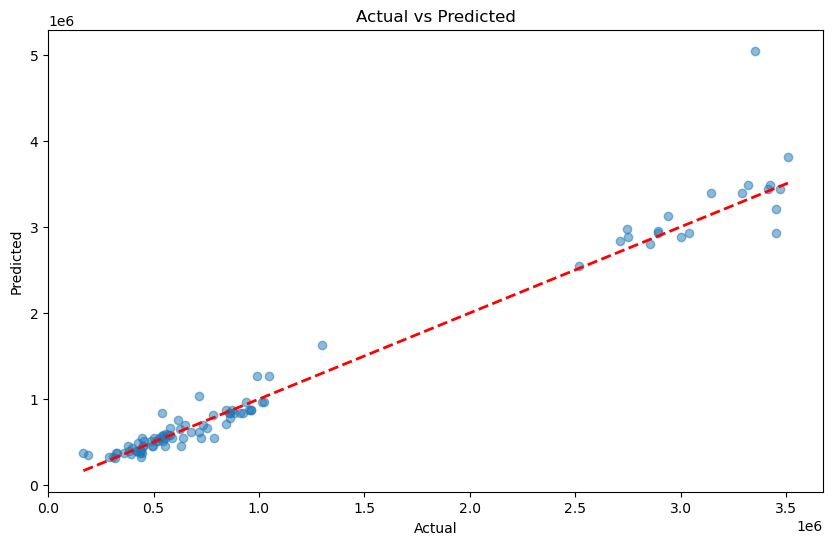

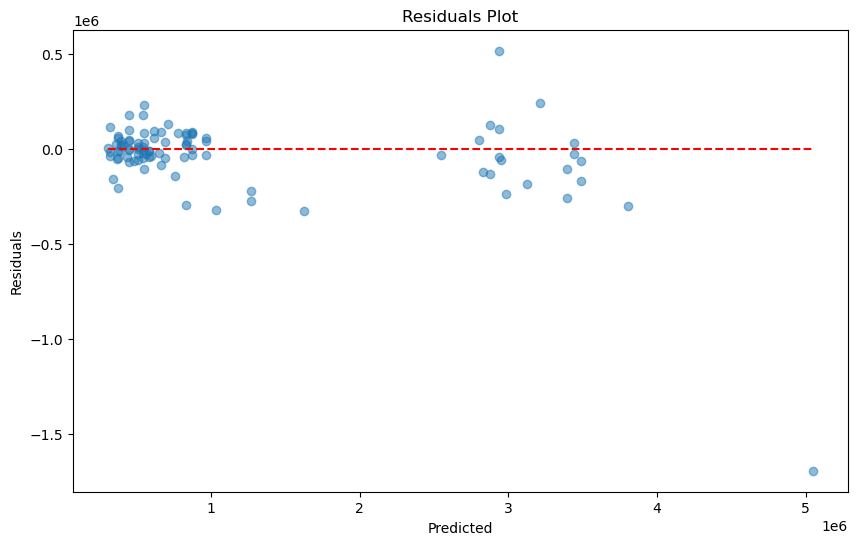

In [6]:
!pip install xgboost

from xgboost import XGBRegressor


# 모델 학습
xgb_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xgb_reg.fit(X_train, Y_train)

# 예측
Y_pred = xgb_reg.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 잔차 계산
residuals = Y_test - Y_pred

# 잔차 플롯
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
